## 2. Data Preparation and Analysis 

In [3]:
import pandas as pd
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline

Key settings and apperances used for plotting throughout the project

## Loading Dataset 

Loading the CSV file and looking at its headers.

In [4]:
df = pd.read_csv('tmdb.csv', index_col=[0])
df.head()

,id,title,adult,popularity,release_date,vote_average,vote_count
0,663712,Terrifier 2,False,8396.618,2022-10-06,7.1,370
1,436270,Black Adam,False,3774.767,2022-10-19,6.9,819
2,717728,Jeepers Creepers: Reborn,False,1927.044,2022-09-15,5.7,413
3,985939,Fall,False,1807.787,2022-08-11,7.3,1626
4,760161,Orphan: First Kill,False,1649.832,2022-07-27,6.8,1216


## Data Preprocessing 

Printing information about the DataFrame including the index dtype, columns and non-null values.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1952 entries, 0 to 1951
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1952 non-null   int64  
 1   title         1952 non-null   object 
 2   adult         1952 non-null   bool   
 3   popularity    1952 non-null   float64
 4   release_date  1952 non-null   object 
 5   vote_average  1952 non-null   float64
 6   vote_count    1952 non-null   int64  
dtypes: bool(1), float64(2), int64(2), object(2)
memory usage: 108.7+ KB


The dtype of the release date column is incorrect and should be converted into the datetime dtype.

In [6]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [7]:
df['release_date'].dtypes

dtype('<M8[ns]')

Now checking for any dataframe entries that have null values

In [8]:
df.isnull().sum()

id              0
title           0
adult           0
popularity      0
release_date    0
vote_average    0
vote_count      0
dtype: int64

There are no null entries present within the dataframe, now I will check for any duplicate entries.

In [9]:
df.duplicated().sum()

20

There are duplicated entries within the dataframe,  I will now remove them from the dataframe

In [10]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

The duplicated entries have now been removed. I will now check the number of rows and columns that remain in the dataframe.

In [11]:
df.shape

(1932, 7)

Showing a statistical summary of the dataframe. 

In [12]:
df.describe()

,id,popularity,vote_average,vote_count
count,1.932000e+03,1932.000000,1932.000000,1932.000000
mean,9.228829e+05,30.997765,2.337060,69.295031
std,1.676227e+05,241.154165,3.278582,830.377249
min,5.780000e+02,0.000000,0.000000,0.000000
25%,8.641508e+05,1.529000,0.000000,0.000000
50%,1.005338e+06,2.668500,0.000000,0.000000
75%,1.031174e+06,6.707500,6.000000,1.000000
max,1.044385e+06,8396.618000,10.000000,26443.000000


There are many values within the columns vote_count and vote_average that equate to 0. This means that this data was entered incorrectly and should be counted and removed from the dataframe.


In [13]:
column = ['vote_average','vote_count']
for column_name in column:
    column = df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    print('Count of zeros in column ', column_name, ' is : ', count)

Count of zeros in column  vote_average  is :  1233
Count of zeros in column  vote_count  is :  1232


Now that the rows that equate to zero have been counted, they will be removed from the dataframe.

In [14]:
df =df.query("vote_average   != 0 ")

In [15]:
df.describe()

,id,popularity,vote_average,vote_count
count,6.990000e+02,699.000000,699.000000,699.000000
mean,8.221520e+05,77.268638,6.459514,191.525036
std,2.105507e+05,396.730880,1.752119,1372.630495
min,5.780000e+02,0.600000,1.000000,0.000000
25%,7.449420e+05,2.643000,5.900000,1.000000
50%,8.606230e+05,5.739000,6.600000,4.000000
75%,9.749355e+05,17.580000,7.400000,33.000000
max,1.043982e+06,8396.618000,10.000000,26443.000000


There are still entries that equal zero in the vote_count column, they should be removed aswell.

In [16]:
df.query("vote_count   == 0 ")

,id,title,adult,popularity,release_date,vote_average,vote_count
818,826448,Buffoon,False,3.389,2022-09-23,7.0,0


There is a single remaining entry that is equal to zero in the vote_count column. It will now be removed. 

In [17]:
df =df.query("vote_count   != 0 ")

In [18]:
df.describe()

,id,popularity,vote_average,vote_count
count,6.980000e+02,698.000000,698.000000,698.000000
mean,8.221458e+05,77.374483,6.458739,191.799427
std,2.107016e+05,397.005501,1.753256,1373.595628
min,5.780000e+02,0.600000,1.000000,1.000000
25%,7.446090e+05,2.642500,5.900000,1.000000
50%,8.607385e+05,5.740000,6.600000,4.000000
75%,9.749382e+05,17.725500,7.400000,33.000000
max,1.043982e+06,8396.618000,10.000000,26443.000000


There are now no entries that equal 0 in the dataframe.

In [19]:
df.adult.value_counts()

False    698
Name: adult, dtype: int64

All the movies that were played, arn't in the adult category and this column is no longer needed. As all values within the category are identical so it will be removed. 

In [20]:
df.drop(['adult'], axis=1, inplace = True)

In [21]:
df.shape

(698, 6)

There are now only 6 columns within the dataframe after the adult column has been removed. I will now procced 
to anylasis the dataset. 


# Data Analysis 

I will start by identifying the 10 most popular movies within the dataframe.

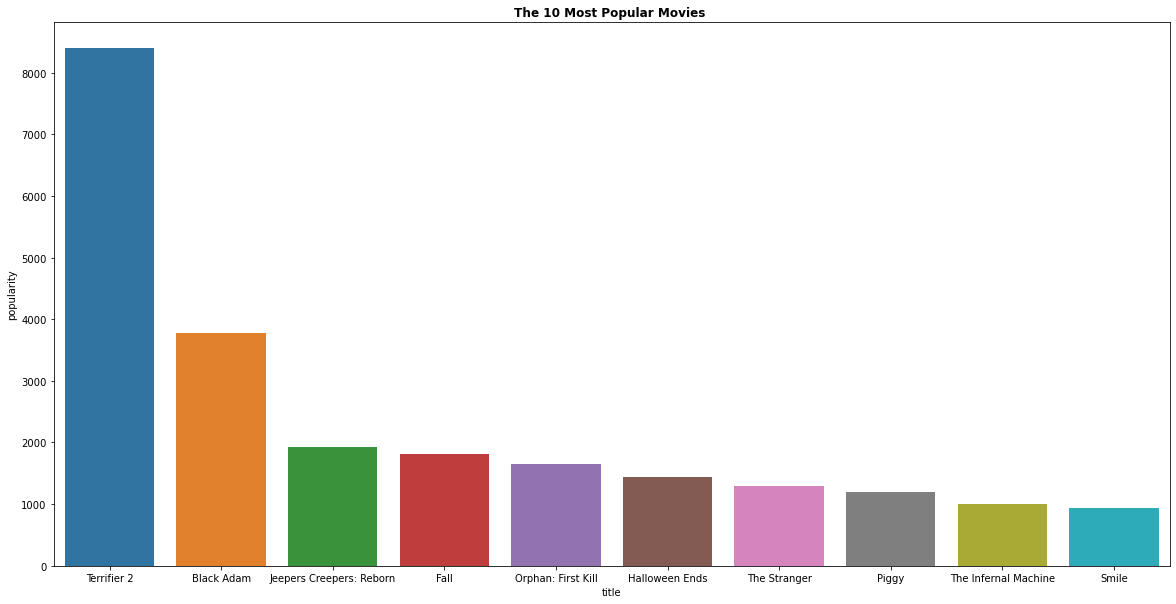

In [22]:
top_popularity = df.sort_values(['popularity'], ascending = False)
fig,axs=plt.subplots(figsize=(20,10))
g=sns.barplot(x=top_popularity['title'][:10],y=top_popularity['popularity'][:10])
g.set_title("The 10 Most Popular Movies ", weight = "bold")
plt.show()

As shown above the movies with the highest popularity are Terrifier 2, Black Adam, Jeeprs Creepers: Reborn, Fall, Orphan First Kill, Halloween Ends, The Stranger, Piggy, The infernal Machine and Smile.

Theese movies are nearly all Horror movies, which makes sense given that this is Halloween. This demonstrates that a movies popularity may be influenced by external factors such as Holidays and Seasonal events. Many of the movies are also recent releases which is demonstrative of popularity's usage as a short term measurement of success. 

I will now look at the movies that recieved the most votes. 

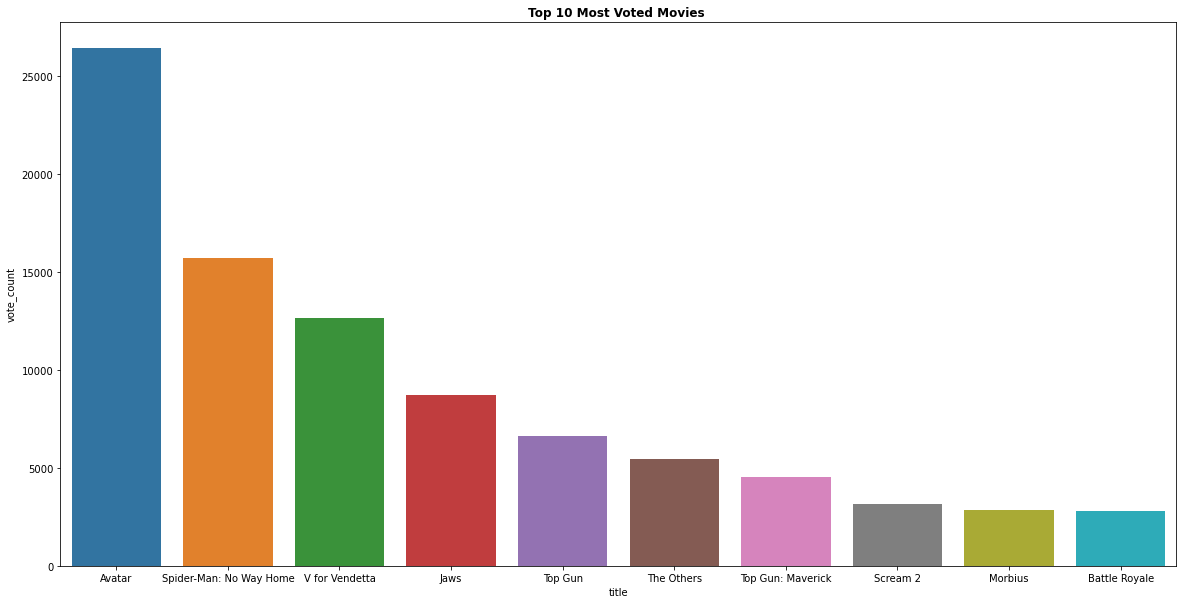

In [23]:
vote_counts = df.sort_values(['vote_count'], ascending = False)
fig,axs=plt.subplots(figsize=(20,10))
g=sns.barplot(x=vote_counts['title'][:10],y=vote_counts['vote_count'][:10])
g.set_title("Top 10 Most Voted Movies ", weight = "bold")
plt.show()

Avatar, Spider-Man: No Way Home, V for Vandetta, Jaws, Top Gun, The Others, Top Gun Maverick, Scream 2, Morbius and Battle Royale are the 10 Movies with the most votes in the dataframe. There seems to be no immediate correlation visible between popularity and recieving votes as none of top ten in either Barchart match each other. 

This isn't suprising as a movies popularity can be effected by external factors, such as Halloween which has resulted in the nearly all the ten most popular movies sharing the same genre, horror. The movies with the highest vote_counts are less effected by external factors and are better examples of a movies lasting popularity and enduring values. Vote_count is a better stat to track the long term success of a move while popularity only shows it's immediate success. 



In [24]:
# creating a new column to only store the year.
top_popularity['year'] = top_popularity['release_date'].dt.year

Displaying the distribution of Popularity with histogram

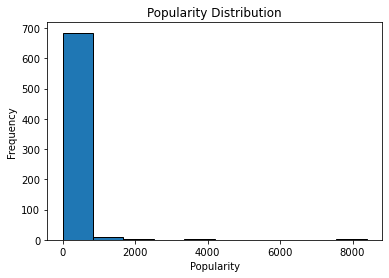

In [25]:
plt.hist(top_popularity.popularity,edgecolor = 'black')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Popularity Distribution')
plt.show() 

The majority of popularity values fall between 0 and 1000. 

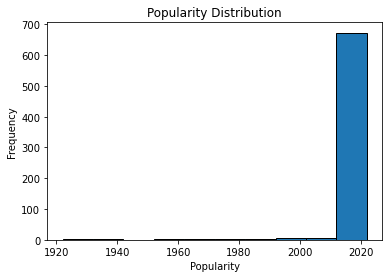

In [26]:
plt.hist(top_popularity.year,edgecolor = 'black')
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Popularity Distribution')
plt.show() 

In [27]:
top_popularity.year.value_counts()


2022    570
2021     71
2020     19
2019      9
1982      2
2009      2
2018      2
1936      1
1939      1
1991      1
1955      1
1964      1
1975      1
1976      1
1978      1
1923      1
1986      1
1997      1
1992      1
1994      1
1998      1
2000      1
2001      1
2006      1
2007      1
2008      1
2011      1
2013      1
2017      1
1922      1
Name: year, dtype: int64

There is a huge difference between the count of movies produced in 2022 and movies produced in any other year. The year with the second highest count of popular movies, 2021, has 70 which is an eight of total of popular movies produced in 2022. The third highest year 2020 has just over 3% of the amount of popular movies produced in 2022. 





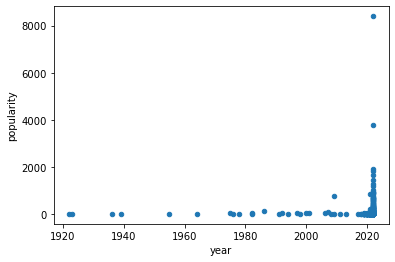

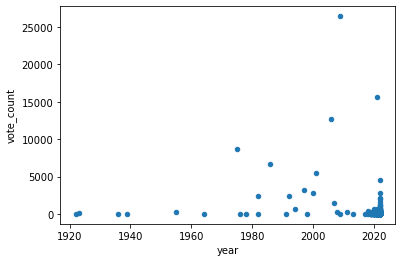

In [28]:
top_popularity.plot.scatter(x='year',y='popularity');
top_popularity.plot.scatter(x='year',y='vote_count');

There seems to be no immediate or visible correlation between the vote_count, vote_average and popularity of movie's. There are too many outliers present within the scatterplot diagram that indicate a lack of correlation. Though it is neccessary to conduct more analysis before making any definitive conclussions. 

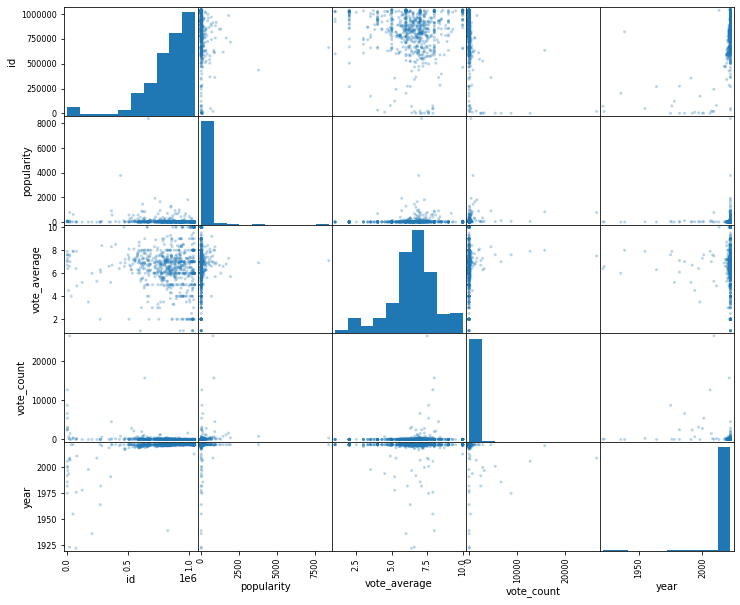

In [29]:
scatter_matrix(top_popularity, figsize=(12,10), alpha=0.3);

This scatter matrix also displays this but can be quite difficult to immediately interpret, so I will use a correlation heatmap 
to illustrate this. The correlation heatmap will be produced using the corr() function and heatmap.

In [30]:
cormat = top_popularity.corr()
round(cormat,10)

,id,popularity,vote_average,vote_count,year
id,1.000000,-0.112205,-0.046873,-0.349001,0.525300
popularity,-0.112205,1.000000,0.050543,0.135285,0.024068
vote_average,-0.046873,0.050543,1.000000,0.074059,-0.024451
vote_count,-0.349001,0.135285,0.074059,1.000000,-0.174142
year,0.525300,0.024068,-0.024451,-0.174142,1.000000


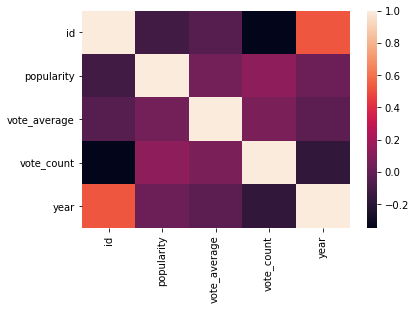

In [31]:
sns.heatmap(cormat);

The heatmap illustrates that there is very little correlation present within this database. Next in addition to examining the total number of vote_count per year I will also examine the average popularity of movies with respect to years. 

Though there is no correlation between a movies popularity and movies that have received the highest vote_count, but by examining a movies popularity with respect to the year of its release, I will show that a movies vote_count serves as a good indicator to a movies long term success. 

<AxesSubplot:>

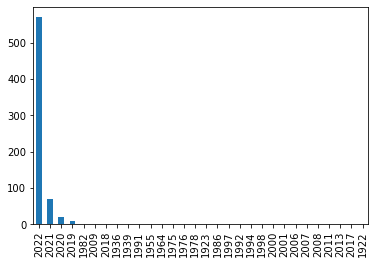

In [32]:
top_popularity.year.value_counts().plot(kind="bar")

As I analysed earlier the year 2022 has the most movie counts in this dataset. I will now examine the mean popularity of movies with respect to years. If recency and popularity is a deciding or prevailing factor in a movies long term prospects and popularity 2022 should have on average the most popular movies in the dataframe followed by 2021, 2020 and 2019.

Though it is still a possibility that other years will have a higher average score, judging from the Top ten most voted movies there are still a large number of highly regarded older films that should have a significant bearing on the results.


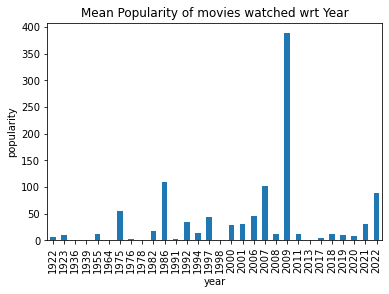

In [33]:
top_popularity.groupby('year')["popularity"].mean().plot(kind="bar")
#Wrt means with reference to 
plt.title('Mean Popularity of movies watched wrt Year')
plt.ylabel("popularity");

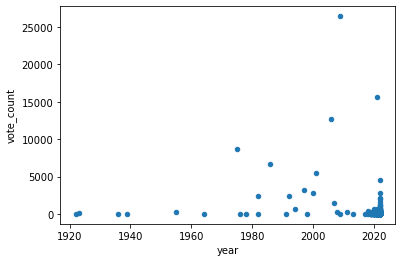

In [34]:
top_popularity.plot.scatter(x='year',y='vote_count');

The year 2009 has by far the highest amount of popular movies in this dataset, despite the fact that the year 2022 has the highest movie counts within popularity and all of the current Top Ten most popular movies were released that year.Though the four most recent years make up the majority of movies within the dataset, 2009 which only holds two entries, less then 0.4% of 2022's 560 entries, and 2007 which only holds a single entry, are on average years with more popular movies. 

This demonstrates the lack of correlation between a movies recenct/short term popularity and its long term success. This is also an illustration of how prevailing and enduring successful movies can be. Vote_count is indicative of the long and to some degree the short term engagement a movie has received. For example in 2009 the movie that received the most votes in this dataframe, Avatar was released which raised 2009's mean popularity substantially. This indicates that the higher the vote_count of a movie the better it's long term popularity or relevancy. It would appear that the movies that receive higher vote_count, serve as a better long term indication of a movies overall relevancy and impact. 

Next I will examine the relationship between popularity, vote_count and the vote_average. 

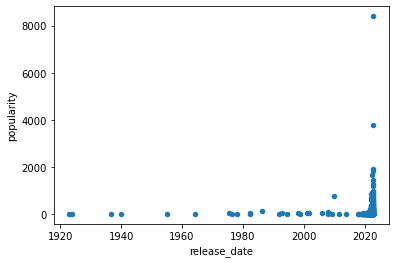

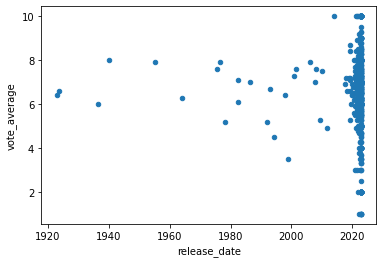

In [35]:
top_popularity.plot.scatter(x='release_date',y='popularity');
top_popularity.plot.scatter(x='release_date',y='vote_average');

As illustrated by the earlier heatmap and once again by the outliers in this diagram there is no correlation between the popularity of a movie and the ratings/vote_average it will receive. Through my analysis it is clear that a movies popularity has little effect on its rating, a movies short term exposure/immediate popularity doesn't necessarily indicate a high vote_average. 


In [36]:
df.head()

,id,title,popularity,release_date,vote_average,vote_count
0,663712,Terrifier 2,8396.618,2022-10-06,7.1,370
1,436270,Black Adam,3774.767,2022-10-19,6.9,819
2,717728,Jeepers Creepers: Reborn,1927.044,2022-09-15,5.7,413
3,985939,Fall,1807.787,2022-08-11,7.3,1626
4,760161,Orphan: First Kill,1649.832,2022-07-27,6.8,1216


A brief examination of 5 of the 10 most popular movies shows that a movies popularity is not determined or affected by its vote_average. For example Fall has an average of 7.3 the highest of the 5 movies displayed, but it is still considerably less popular then Black Adam, Jeepers Creepers:Reborn and Terrifier 2. 
 
Terrifier 2 is almost four times more popular then Fall despite it's slightly lower rating. It also has a much lower vote count then Fall, this would suggest that though less people watched Fall more people engaged with it. This also illustrates the weight an individuals vote_average/rating holds is largely determined by the number of people who have already voted. The higher the vote_count the easier it is to raise or lower a movies score. 

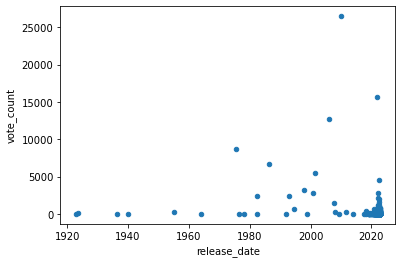

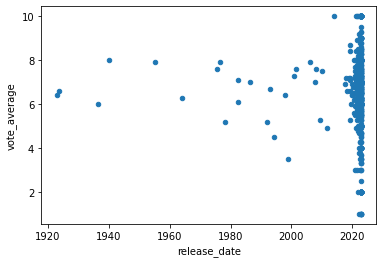

In [37]:
top_popularity.plot.scatter(x='release_date',y='vote_count');
top_popularity.plot.scatter(x='release_date',y='vote_average');

As shown in this diagram the amount of votes received by a movie will not have a signifigant impact on the movies overall rating. It is considerably easier to get a higher or lower vote_average if you recieve a small amount of vote_count. Vote_count is a way to determine a movies long term popularity and engagement with its audience, but this doesn't mean that movies with a high vote_count will receive high ratings/vote_average. As mentioned earlier the lower the vote_count the easier it is to get a higher or lower rating. 

# Conclussion 

This data was analysed by examining movies with respect to popularity, vote_average, realse_date and vote_count. An analysis of the data shows that there is a lack of correlation between the variables present within the data and they are all relatively independant of each other. 

Though there is no relationship between popularity, vote_count and vote_average, movies with higher vote counts are likely more enduringly popular and impactful then movies that are currently popular due to holidays, advertisements and there recent release. There is no correlation between the vote_average of a movie and its popularity or vote_count. Some unpopular movies can recieve high ratings due to their low amounts of vote_counts and movies which are currently popular appear unaffected by their ratings because they are effected by external factors. 

Some challenges I faced during this anylasis was the lack of correlation between headers, having to remove variables because they lacked a valid input and the need to consistently perform a check before scrapping data due to the constant change in the page numbers

For future anylasis it would be benificial to integrate other data sources. Being able to extract and examine other variables that could influence a movies popularity, vote_average and vote_count such as the movies budget, revenue and gross profit would make my analysis more complete. I would expect to see much more correlation within the analysis if integrated with other data sets, for example I would expect to see correlation between a movies popularity and revenue.
